### Questions
### 1)Which factor influenced a candidate in getting placed?
### 2)Does percentage matters for one to get placed?
### 3)Which degree specialization is much demanded by corporate?
### 4)Play with the data conducting all statistical tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [6]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [7]:
df_campus = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [8]:
df_campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
df_campus.drop(columns='sl_no',inplace=True)

In [10]:
df_campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [11]:
### Imputing 0 in salary column for candidates whose status is not_placed

In [12]:
df_campus.salary = np.where(df_campus.status=='Not Placed',0,df_campus.salary)

In [13]:
df_campus_cont=df_campus[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']]

In [14]:
df_campus_cat=df_campus.loc[:,df_campus.columns.difference(['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary'])]

In [15]:
df_campus_cont.apply(continuous_var_summary)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
N,215.000000,215.000000,215.000000,215.000000,215.000000,2.150000e+02
NMISS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
SUM,14470.230000,14261.630000,14269.590000,15501.620000,13389.810000,4.272100e+07
MEAN,67.303395,66.333163,66.370186,72.100558,62.278186,1.987023e+05
MEDIAN,67.000000,65.000000,66.000000,71.000000,62.000000,2.400000e+05
STD,10.827205,10.897509,7.358743,13.275956,5.833385,1.547809e+05
VAR,117.228377,118.755706,54.151103,176.251018,34.028376,2.395714e+10
MIN,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000e+00
P1,43.140000,40.280000,50.968000,50.067200,51.468200,0.000000e+00
P5,49.700000,48.400000,54.814000,54.336000,53.263000,0.000000e+00


In [16]:
df_campus_cat.apply(categorical_var_summary)

,degree_t,gender,hsc_b,hsc_s,specialisation,ssc_b,status,workex
N,215,215,215,215,215,215,215,215
NMISS,0,0,0,0,0,0,0,0
MODE,Comm&Mgmt,M,Others,Commerce,Mkt&Fin,Central,Placed,No
FREQ,145,139,131,113,120,116,148,141
PERCENT,67.44,64.65,60.93,52.56,55.81,53.95,68.84,65.58


In [17]:
def cat_count (x):
    sns.countplot(x)
    plt.show()

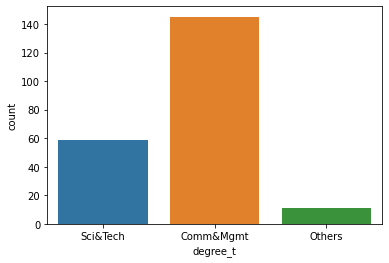

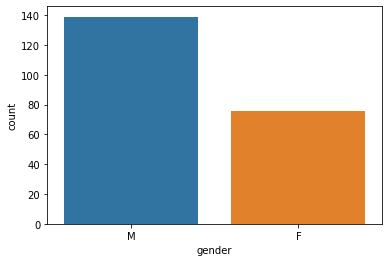

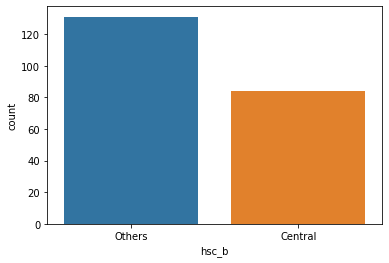

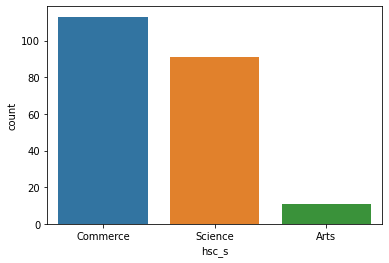

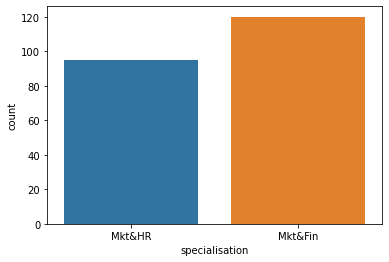

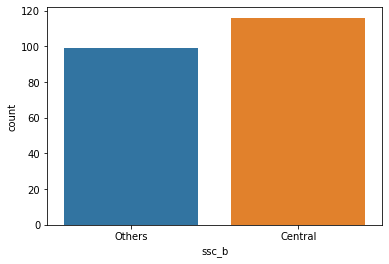

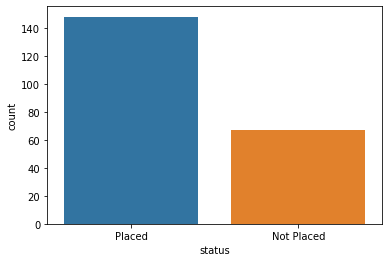

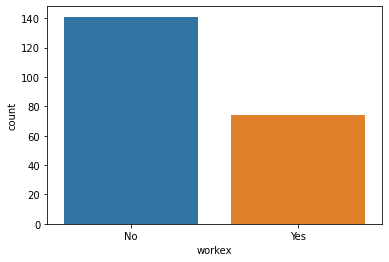

degree_t          None
gender            None
hsc_b             None
hsc_s             None
specialisation    None
ssc_b             None
status            None
workex            None
dtype: object

In [18]:
df_campus_cat.apply(cat_count)

In [19]:
def box_cont(x):
    sns.boxplot(x)
    plt.show()

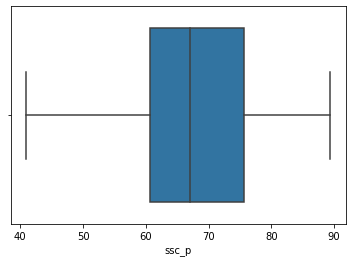

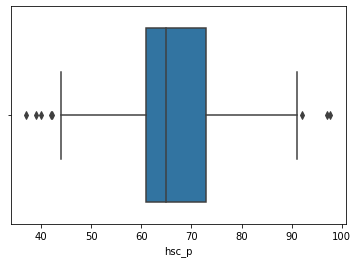

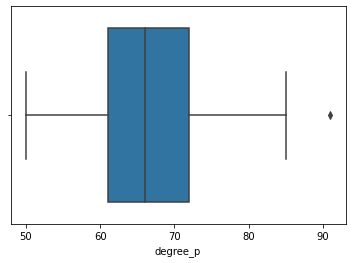

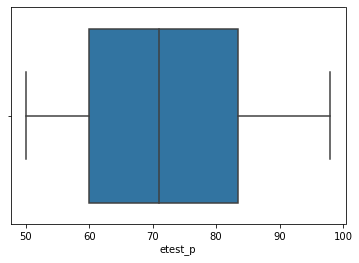

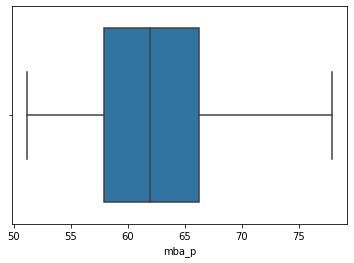

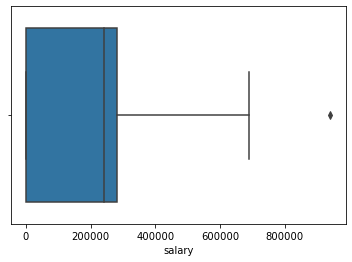

ssc_p       None
hsc_p       None
degree_p    None
etest_p     None
mba_p       None
salary      None
dtype: object

In [20]:
df_campus_cont.apply(box_cont)

In [21]:
### Outlier Treatement

In [22]:
df_campus_cont = df_campus_cont.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.dropna().quantile(0.99)))

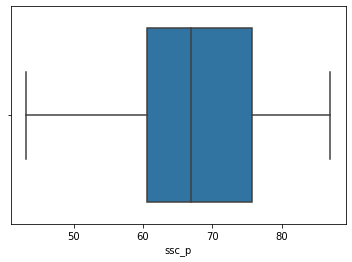

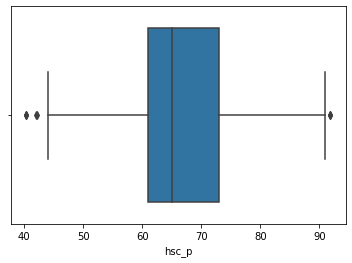

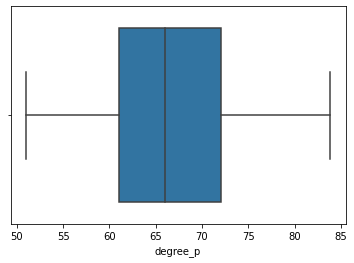

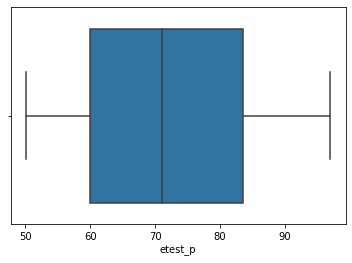

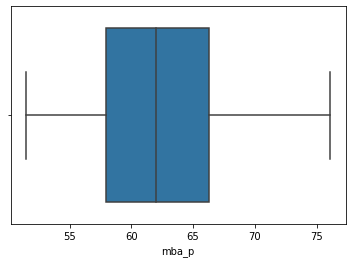

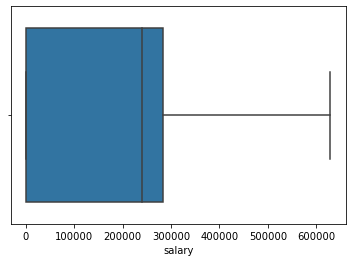

ssc_p       None
hsc_p       None
degree_p    None
etest_p     None
mba_p       None
salary      None
dtype: object

In [23]:
df_campus_cont.apply(box_cont)

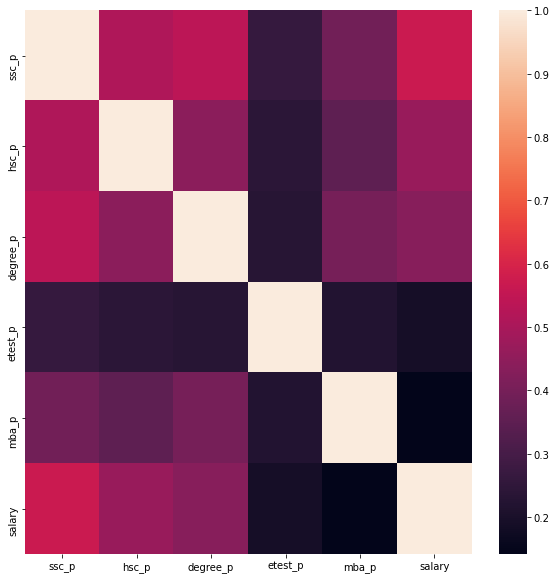

In [24]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df_campus_cont.corr())
plt.show()

In [25]:
# for c_feature in categorical_features
for c_feature in list(df_campus_cat.columns):
    df_campus_cat[c_feature] = df_campus_cat[c_feature].astype('category')
    df_campus_cat = create_dummies(df_campus_cat, c_feature)

In [26]:
df_campus_new=pd.concat([df_campus_cont,df_campus_cat],axis = 1)

In [27]:
df_campus_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ssc_p                  215 non-null    float64
 1   hsc_p                  215 non-null    float64
 2   degree_p               215 non-null    float64
 3   etest_p                215 non-null    float64
 4   mba_p                  215 non-null    float64
 5   salary                 215 non-null    float64
 6   degree_t_Others        215 non-null    uint8  
 7   degree_t_Sci&Tech      215 non-null    uint8  
 8   gender_M               215 non-null    uint8  
 9   hsc_b_Others           215 non-null    uint8  
 10  hsc_s_Commerce         215 non-null    uint8  
 11  hsc_s_Science          215 non-null    uint8  
 12  specialisation_Mkt&HR  215 non-null    uint8  
 13  ssc_b_Others           215 non-null    uint8  
 14  status_Placed          215 non-null    uint8  
 15  workex

In [28]:
df_campus_new.status_Placed.value_counts()

1    148
0     67
Name: status_Placed, dtype: int64

In [29]:
# F_regression

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [31]:
df_campus_new.rename(columns={'specialisation_Mkt&HR':'specialisation_Mkt_HR'},inplace=True)

In [32]:
df_campus_new.rename(columns={'degree_t_Sci&Tech':'degree_t_Sci_Tech'},inplace=True)

In [33]:
# get all the independant variables for model creation
model_param = 'status_Placed ~ ' + ' + '.join(list(df_campus_new.columns.difference(['status_Placed'])))

In [34]:
model_param

'status_Placed ~ degree_p + degree_t_Others + degree_t_Sci_Tech + etest_p + gender_M + hsc_b_Others + hsc_p + hsc_s_Commerce + hsc_s_Science + mba_p + salary + specialisation_Mkt_HR + ssc_b_Others + ssc_p + workex_Yes'

In [35]:
model_param='''status_Placed ~ degree_p + degree_t_Others + degree_t_Sci_Tech + etest_p + gender_M + 
                hsc_b_Others + hsc_p + hsc_s_Commerce + mba_p + 
            salary + specialisation_Mkt_HR + ssc_b_Others + ssc_p + workex_Yes'''

In [36]:
# separate the Y and X variables
y, X = dmatrices(model_param,df_campus_new, return_type = 'dataframe')

In [37]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,218.5
1,degree_p,1.7
2,degree_t_Others,1.3
3,degree_t_Sci_Tech,1.8
4,etest_p,1.2
5,gender_M,1.3
6,hsc_b_Others,1.7
7,hsc_p,2.0
8,hsc_s_Commerce,2.0
9,mba_p,1.5


In [38]:
# Train and Test split
train, test = train_test_split(df_campus_new, test_size = 0.3, random_state =  123)

In [39]:
model_param='''status_Placed ~ degree_p + degree_t_Others + degree_t_Sci_Tech + etest_p + gender_M + 
                hsc_b_Others + hsc_p + hsc_s_Commerce + mba_p + specialisation_Mkt_HR + ssc_b_Others + ssc_p + workex_Yes'''

In [40]:
train

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,degree_t_Others,degree_t_Sci_Tech,gender_M,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,specialisation_Mkt_HR,ssc_b_Others,status_Placed,workex_Yes
41,74.0,63.16,65.0,65.00,69.76,0.0,0,0,0,1,1,0,1,1,0,1
95,73.0,78.00,65.0,95.46,62.16,420000.0,0,0,1,1,1,0,0,0,1,1
170,63.4,67.20,60.0,58.06,69.28,0.0,0,0,0,1,1,0,1,1,0,0
82,63.0,67.00,74.0,82.00,60.44,0.0,0,0,1,0,1,0,0,0,0,0
185,87.0,72.00,78.0,82.00,71.43,252000.0,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,55.0,67.00,64.0,60.00,67.28,0.0,0,0,0,0,1,0,0,0,0,0
98,69.0,73.00,65.0,70.00,57.31,220000.0,0,0,0,0,1,0,0,0,1,0
66,83.0,74.00,66.0,68.92,58.46,275000.0,0,0,1,1,0,1,1,1,1,0
126,79.0,61.00,75.5,70.00,68.20,210000.0,0,1,0,1,0,1,0,1,1,1


In [41]:
m1 = smf.logit(formula = model_param, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.251434
         Iterations 8


In [42]:
print(m1.summary())

                           Logit Regression Results                           
Dep. Variable:          status_Placed   No. Observations:                  150
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                           13
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.5845
Time:                        13:22:34   Log-Likelihood:                -37.715
converged:                       True   LL-Null:                       -90.766
Covariance Type:            nonrobust   LLR p-value:                 1.079e-16
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -18.8026      6.590     -2.853      0.004     -31.719      -5.886
degree_p                  0.1550      0.061      2.553      0.011       0.036       0.274
degree_t

In [43]:
p = m1.predict(train)

In [44]:
# empty dataframe
somersd_df = pd.DataFrame()

# iterate for each of the X - dependant variables and get the Somer's D value
for num_variable in train.columns.difference(['status_Placed','salary']):
    
    # execute teh logit model
    logreg = smf.logit(formula = str('status_Placed ~ ') + str(num_variable), data = train).fit()
    
    # get the predicted probabilities and create a dataframe with the predicted values
    y_score = pd.DataFrame(logreg.predict())
    
    # name the column of the df as score
    y_score.columns = ['Score']
    
    # calculate the Somer's D values
    somers_d = 2 * metrics.roc_auc_score(train['status_Placed'], y_score) - 1
    
    # place the variable name and the Somers' D score in a temp dataframe
    temp = pd.DataFrame([num_variable, somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    
    # append the data in the dataframe for all the X variables
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.473858
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599801
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603428
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600897
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.601587
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.605109
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.451751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.604987
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.602378
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.598886
  

In [45]:
somersd_df['Var_Sig']=np.where(somersd_df.SomersD < 0.2 , 'Insig','Sig')

### 2)Does percentage matters for one to get placed?

In [46]:
### Yes, the percentage matter in getting placed. Please check the below significant variables after Sommer's D

In [47]:
somersd_df

,Variable Name,SomersD,Var_Sig
0,degree_p,0.615352,Sig
0,degree_t_Others,0.0531732,Insig
0,degree_t_Sci_Tech,0.0557461,Insig
0,etest_p,0.100129,Insig
0,gender_M,0.0883362,Insig
0,hsc_b_Others,0.000428816,Insig
0,hsc_p,0.592624,Sig
0,hsc_s_Commerce,0.0171527,Insig
0,hsc_s_Science,0.0797599,Insig
0,mba_p,0.117925,Insig


In [48]:
model_param='''status_Placed ~ degree_p +hsc_p+ specialisation_Mkt_HR + ssc_p + workex_Yes'''

In [49]:
m1 = smf.logit(formula = model_param, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.305476
         Iterations 8


In [50]:
print(m1.summary())

                           Logit Regression Results                           
Dep. Variable:          status_Placed   No. Observations:                  150
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.4952
Time:                        13:22:35   Log-Likelihood:                -45.821
converged:                       True   LL-Null:                       -90.766
Covariance Type:            nonrobust   LLR p-value:                 7.086e-18
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -20.9022      4.118     -5.076      0.000     -28.972     -12.832
degree_p                  0.1039      0.047      2.209      0.027       0.012       0.196
hsc_p   

In [51]:
train_predict = m1.predict(train)

In [52]:
test_predict = m1.predict(test)

In [53]:
df_campus_new.status_Placed.mean()

0.6883720930232559

In [54]:
metrics.accuracy_score( train['status_Placed'],
                            train_predict>0.688)

0.86

In [55]:
# model performance | Method 1: AUC
train_auc = metrics.roc_auc_score(train['status_Placed'], train_predict)
test_auc = metrics.roc_auc_score(test['status_Placed'], test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9258147512864494
The AUC for the model built on the Test Data is :  0.9151138716356109


In [56]:
feature_col=list(['degree_p','degree_t_Others','degree_t_Sci_Tech','etest_p','gender_M','hsc_b_Others','hsc_p','hsc_s_Commerce','mba_p','salary','specialisation_Mkt_HR','ssc_b_Others','ssc_p','workex_Yes'])

In [57]:
## Using Random Forest

In [58]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( df_campus_new[feature_col],
                                                  df_campus_new['status_Placed'],
                                                  test_size = 0.3,
                                                  random_state = 555 )

In [59]:
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=123)

train_X_os, train_y_os = ros.fit_sample(train_X, train_y)

unique_elements, counts_elements = np.unique(train_y_os, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Using TensorFlow backend.


Frequency of unique values of the said array:
[[  0   1]
 [102 102]]


In [60]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree as dt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [61]:
pargrid_rf = {'n_estimators': np.arange(50,60,70),
                  'max_features': np.arange(5,8)}

#from sklearn.grid_search import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.8s finished


In [62]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 50}

In [63]:
gscv_rf.best_score_

1.0

In [64]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=50, max_features=5, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=5, n_estimators=50, n_jobs=-1,
                       oob_score=True)

In [65]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_clf.predict( train_X ) } )

In [66]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [67]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))

1.0


In [68]:
feat_imp=list(zip(train_X.columns,radm_clf.feature_importances_))

In [69]:
feat_imp

[('degree_p', 0.10891725807241161),
 ('degree_t_Others', 0.002024093971328052),
 ('degree_t_Sci_Tech', 0.0),
 ('etest_p', 0.01155093901836966),
 ('gender_M', 0.003970561144737037),
 ('hsc_b_Others', 6.430041152263402e-05),
 ('hsc_p', 0.07619707403088062),
 ('hsc_s_Commerce', 0.0010086754017881437),
 ('mba_p', 0.0264912304501587),
 ('salary', 0.6342305680823371),
 ('specialisation_Mkt_HR', 0.011085829190060521),
 ('ssc_b_Others', 0.002025061066016197),
 ('ssc_p', 0.11532871830172388),
 ('workex_Yes', 0.007105690858665871)]

In [70]:
df_feat_imp=pd.DataFrame(feat_imp)

In [71]:
df_feat_imp.columns=['Features','Importance']

### 1)Which factor influenced a candidate in getting placed?

In [72]:
### Top 5 features are selected using Logistic Regression 
#degree_p 
#hsc_p 
#specialisation_Mkt_HR
#ssc_p
#workex_Yes
### Top 5 features are selected using Random Forest
#degree_p 
#hsc_p 
#salary
#ssc_p
#mba_p

In [73]:
#Top 5 features
df_feat_imp.sort_values(by='Importance',ascending = False).head(5)

,Features,Importance
9,salary,0.634231
12,ssc_p,0.115329
0,degree_p,0.108917
6,hsc_p,0.076197
8,mba_p,0.026491


### 3)Which degree specialization is much demanded by corporate?

In [74]:
### Specialisation in Marketing and Finance is in more demand in the Corporate

In [75]:
df_campus[['specialisation','status']]

,specialisation,status
0,Mkt&HR,Placed
1,Mkt&Fin,Placed
2,Mkt&Fin,Placed
3,Mkt&HR,Not Placed
4,Mkt&Fin,Placed
...,...,...
210,Mkt&Fin,Placed
211,Mkt&Fin,Placed
212,Mkt&Fin,Placed
213,Mkt&HR,Placed


In [76]:
df_campus.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [77]:
df_campus.loc[(df_campus.specialisation == 'Mkt&Fin') & (df_campus.status=='Placed')].status.count()

95

In [78]:
df_campus.loc[(df_campus.specialisation == 'Mkt&HR') & (df_campus.status=='Placed')].status.count()

53